In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install re
!pip install nltk
!pip install wordcloud

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


     |################################| 366 kB 23.7 MB/s            


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
#from textblob import TextBlob
%matplotlib inline

In [ ]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(mpl.__version__)
print(re.__version__)

1.18.5
1.1.5
0.11.2
3.3.4
2.2.1


In [ ]:
data = pd.read_csv('data/bitcointweets.csv', header=None)

In [ ]:
data.shape

(50859, 8)

In [ ]:
data.head(100)

,0,1,2,3,4,5,6,7
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
...,...,...,...,...,...,...,...,...
95,Fri Mar 23 00:41:37 +0000 2018,Bitcoin heading back down. \u2026 $BTCUSD htt...,TV_TradingIdeas,13877,0,[],"<a href=""https://www.tradingview.com"" rel=""nof...",['negative']
96,Fri Mar 23 00:41:39 +0000 2018,RT @RichardHeartWin: The #Bitcoin 50/200 daily...,FollowJRB,414,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/iphone"" r...",['negative']
97,Fri Mar 23 00:41:39 +0000 2018,Facebook's data privacy fallout could give a b...,MeetInnovation,11133,0,[],"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",['neutral']
98,Fri Mar 23 00:41:40 +0000 2018,RT @BeerMoneyFunds: Bank of Japan: No Big Prob...,Criptovaleur,1124,0,[],"<a href=""https://plus.google.com/1021286754998...",['positive']


In [ ]:
df = data[[1,7]]
df.columns = ['tweet','label']
df.head()

,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
2,RT @tippereconomy: Another use case for #block...,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce th...,['positive']


In [ ]:
df.tail()

,tweet,label
50854,RT @fixy_app: Fixy Network brings popular cryp...,['positive']
50855,RT @bethereumteam: After a successful launch o...,['positive']
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus ...",['neutral']
50857,I added a video to a @YouTube playlist https:/...,['positive']
50858,RT @Raybambs: Airdrop PhotoCoin Airdrop Round#...,['positive']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   50859 non-null  object
 1   label   50859 non-null  object
dtypes: object(2)
memory usage: 794.8+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

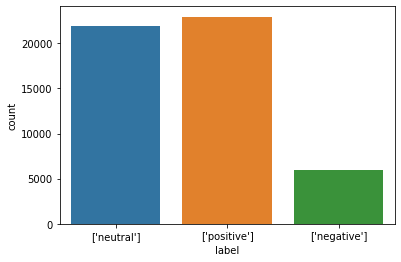

In [ ]:
sns.countplot(df['label'])

In [ ]:
# text length
df['text_length'] = df['tweet'].apply(len)
df[['label','text_length','tweet']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,label,text_length,tweet
0,['neutral'],140,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h..."
1,['neutral'],137,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...
2,['positive'],140,RT @tippereconomy: Another use case for #block...
3,['positive'],34,free coins https://t.co/DiuoePJdap
4,['positive'],146,RT @payvxofficial: WE are happy to announce th...


In [ ]:
df['text_length'].describe()

count    50859.000000
mean       127.650072
std         23.595770
min          7.000000
25%        126.000000
50%        140.000000
75%        140.000000
max        166.000000
Name: text_length, dtype: float64

<AxesSubplot:>

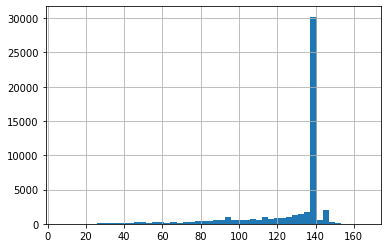

In [ ]:
df['text_length'].hist(bins=50)

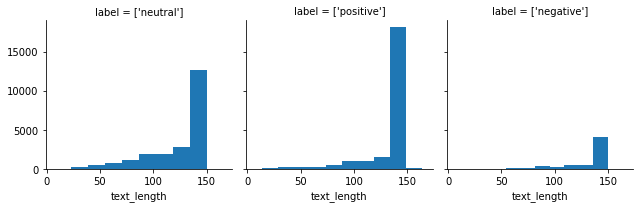

In [ ]:
g = sns.FacetGrid(df,col='label')
g.map(plt.hist,'text_length')

In [ ]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

Remove punctuations

In [ ]:
def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    s = re.sub("#", '', s) # removes the '#' 
    #s = re.sub('#[A-Za-z0-9]+', '', s) # removes any string with a '#'
    s = re.sub('\\n', '', s) # removes the '\n' string
    s = re.sub('https:\/\/\S+', '', s) # removes any hyperlinks
    return s
df['clean_tweet'] = df['tweet'].apply(clean_text) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


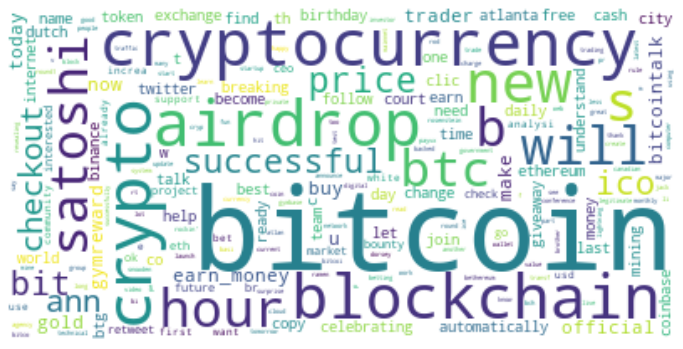

In [ ]:
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

text = df['clean_tweet'].to_string().lower() 

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=stopwords,
    background_color="white").generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [ ]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['clean_tweet'] = df['clean_tweet'].apply(lambda x: remove_punct(x))
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet,label,text_length,clean_tweet
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for blockchain and Tipper T...
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...
5,Copy successful traders automatically with Bit...,['positive'],138,Copy successful traders automatically with Bit...
6,RT @bethereumteam: We're revealing our surpris...,['positive'],140,Were revealing our surprise tomorrow Are you...
7,One click to start mining cryptocurrencies tog...,['neutral'],126,One click to start mining cryptocurrencies tog...
8,"first speaker @digitsu\n\n""how we can get bitc...",['positive'],139,first speaker how we can get bitcoin to be the...
9,@p0nd3ea Bitcoin wasn't built to live on excha...,['positive'],51,Bitcoin wasnt built to live on exchanges


Tokenization

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['clean_tweet'].apply(lambda x: tokenization(x.lower()))
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,tweet,label,text_length,clean_tweet,Tweet_tokenized
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin..."
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for blockchain and Tipper T...,"[, another, use, case, for, blockchain, and, t..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ..."


In [ ]:
df['clean_tweet'][2]

'  Another use case for blockchain and Tipper The TipperEconomy  can unseat Facebook and change everything ICO Live No…'

In [ ]:
df['tweet'][2]

'RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy  can unseat Facebook and change everything! ICO Live No…'

Remove Stopwords

In [ ]:
#stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for blockchain and Tipper T...,"[, another, use, case, for, blockchain, and, t...","[, another, use, case, blockchain, tipper, tip..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now..."
5,Copy successful traders automatically with Bit...,['positive'],138,Copy successful traders automatically with Bit...,"[copy, successful, traders, automatically, wit...","[copy, successful, traders, automatically, bit..."
6,RT @bethereumteam: We're revealing our surpris...,['positive'],140,Were revealing our surprise tomorrow Are you...,"[, were, revealing, our, surprise, tomorrow, a...","[, revealing, surprise, tomorrow, ready, celeb..."
7,One click to start mining cryptocurrencies tog...,['neutral'],126,One click to start mining cryptocurrencies tog...,"[one, click, to, start, mining, cryptocurrenci...","[one, click, start, mining, cryptocurrencies, ..."
8,"first speaker @digitsu\n\n""how we can get bitc...",['positive'],139,first speaker how we can get bitcoin to be the...,"[first, speaker, how, we, can, get, bitcoin, t...","[first, speaker, bitcoin, greatest, cash, worl..."
9,@p0nd3ea Bitcoin wasn't built to live on excha...,['positive'],51,Bitcoin wasnt built to live on exchanges,"[, bitcoin, wasnt, built, to, live, on, exchan...","[, bitcoin, wasnt, built, live, exchanges]"


Stemming and Lammitization

In [ ]:
import nltk
from nltk import *

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for blockchain and Tipper T...,"[, another, use, case, for, blockchain, and, t...","[, another, use, case, blockchain, tipper, tip...","[, anoth, use, case, blockchain, tipper, tippe..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ..."


Lemmatizing: Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word.

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[nltk_data]   Unzipping corpora/omw-1.4.zip.


,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for blockchain and Tipper T...,"[, another, use, case, for, blockchain, and, t...","[, another, use, case, blockchain, tipper, tip...","[, anoth, use, case, blockchain, tipper, tippe...","[, another, use, case, blockchain, tipper, tip..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now..."


In [ ]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text

Vectorisation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

50859 tweets has 47125 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaaamhim,aabaafaabdcafacabacb,aabhishekbankar,aadbeaeccabfadcdbaec,aadhaar,aadi,aadikum,aadrak,aamirzaki,...,ℹ,ツ,ビットコイン,ㆍ,ㆍacat,区块链,時分現在,時現在,比特币,転載元
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,..."
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]"
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for blockchain and Tipper T...,"[, another, use, case, for, blockchain, and, t...","[, another, use, case, blockchain, tipper, tip...","[, anoth, use, case, blockchain, tipper, tippe...","[, another, use, case, blockchain, tipper, tip..."
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]"
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             50859 non-null  object
 1   label             50859 non-null  object
 2   text_length       50859 non-null  int64 
 3   clean_tweet       50859 non-null  object
 4   Tweet_tokenized   50859 non-null  object
 5   Tweet_nonstop     50859 non-null  object
 6   Tweet_stemmed     50859 non-null  object
 7   Tweet_lemmatized  50859 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.1+ MB


In [ ]:
df.to_csv('cleantweets.csv', index=False)

In [ ]:
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

text = df['clean_tweet'].to_string().lower()  

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=stopwords,
    background_color="white").generate(text)

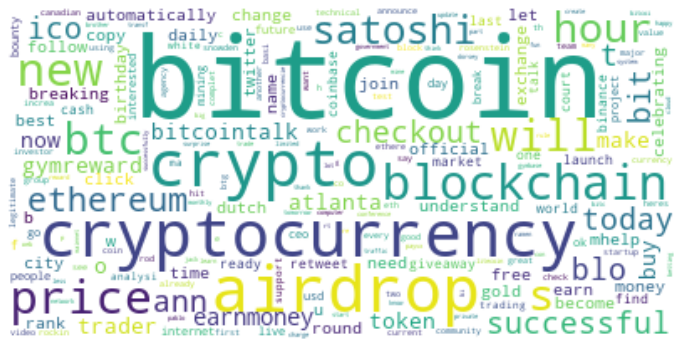

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review2.png")

In [ ]:
stopwords = set(STOPWORDS) #set(stopwords.words('english'))

text = df['Tweet_lemmatized'].to_string().lower() 

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=stopwords,
    background_color="white").generate(text)

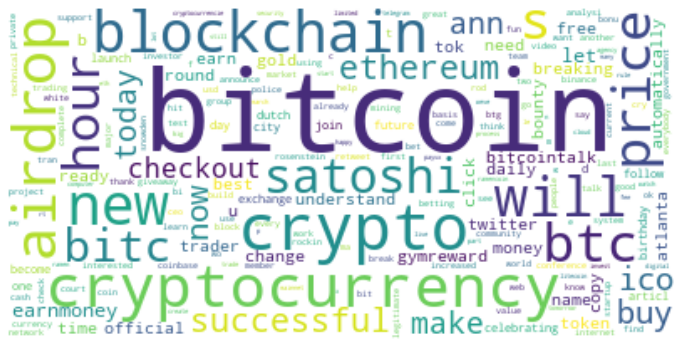

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("first_review3.png")

Derive label using sentiment analysis 

In [ ]:
from textblob import TextBlob

In [ ]:
# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [ ]:
# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
df['polarity'] = df['clean_tweet'].apply(getPolarity)

In [ ]:
df.head(5)

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,subjectivity,polarity
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,...",0.5,0.000000
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]",0.0,0.000000
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang...","[, anoth, use, case, unseat, facebook, chang, ...","[, another, use, case, unseat, facebook, chang...",0.5,0.136364
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]",0.8,0.400000
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now...",1.0,0.800000


In [ ]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [ ]:
# create a column to store the text sentiment
df['sentiment'] = df['polarity'].apply(getSentiment)

# show the data
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,subjectivity,polarity,sentiment
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...","[, paul, krugman, nobel, luddite, tweak, nose,...","[, paul, krugman, nobel, luddit, tweak, nose, ...","[, paul, krugman, nobel, luddite, tweak, nose,...",0.5,0.000000,neutral
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...","[, dum, b, ss, said, know, nothing, bitcoin, ]","[, dum, b, ss, said, know, noth, bitcoin, ]","[, dum, b, s, said, know, nothing, bitcoin, ]",0.0,0.000000,neutral
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for and The can unseat ...,"[, another, use, case, for, and, the, can, uns...","[, another, use, case, unseat, facebook, chang...","[, anoth, use, case, unseat, facebook, chang, ...","[, another, use, case, unseat, facebook, chang...",0.5,0.136364,positive
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]","[free, coins, ]","[free, coin, ]","[free, coin, ]",0.8,0.400000,positive
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...","[, happy, announce, payvx, presale, phase, now...","[, happi, announc, payvx, presal, phase, now, ...","[, happy, announce, payvx, presale, phase, now...",1.0,0.800000,positive


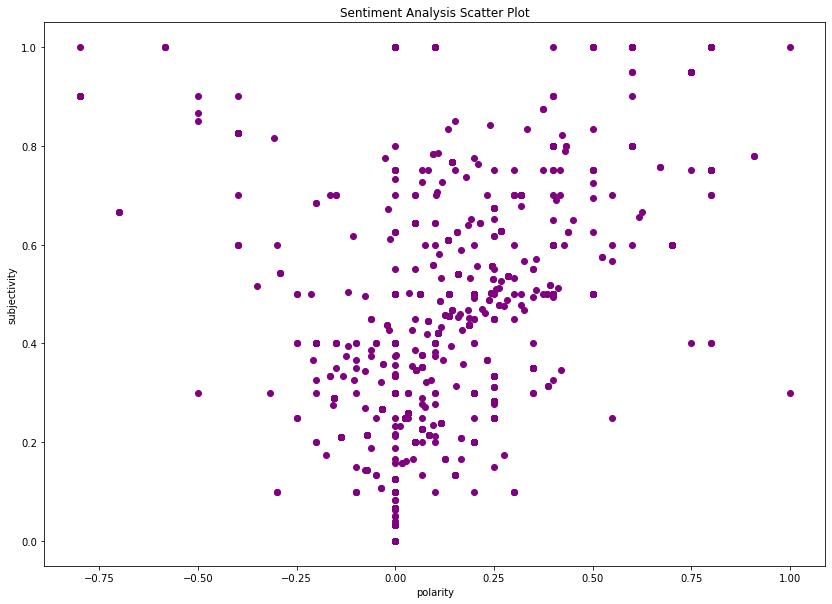

In [ ]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

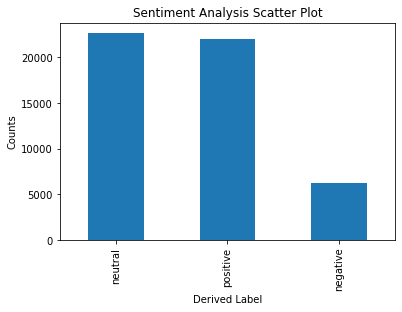

In [ ]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Derived Label")
plt.ylabel("Counts")
plt.show()

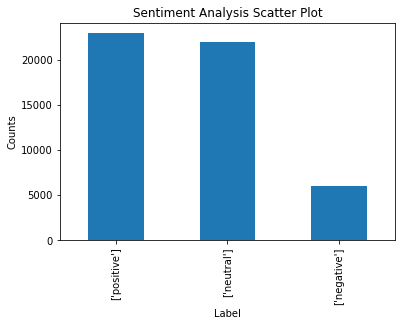

In [ ]:
# create a bar chart to show the cout of Positive, Neutral and Nehative sentiments
df['label'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

In [ ]:
# create a function get the sentiment text
def ConvertToNumerical(label):
    if label == "['negative']":
        return 0
    elif label == "['neutral']":
        return 1
    else:
        return 2

In [ ]:
df['NumericalLabel'] = df['label'].apply(ConvertToNumerical)

<ipython-input-60-06f9c143999f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumericalLabel'] = df['label'].apply(ConvertToNumerical)


In [ ]:
df.head()

,tweet,label,text_length,clean_tweet,Tweet_tokenized,NumericalLabel
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral'],140,Paul Krugman Nobel Luddite I had to tweak th...,"[, paul, krugman, nobel, luddite, i, had, to, ...",1
1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral'],137,But dum b a ss said you know nothing abou...,"[, but, dum, b, a, ss, said, you, know, nothin...",1
2,RT @tippereconomy: Another use case for #block...,['positive'],140,Another use case for blockchain and Tipper T...,"[, another, use, case, for, blockchain, and, t...",2
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins,"[free, coins, ]",2
4,RT @payvxofficial: WE are happy to announce th...,['positive'],146,WE are happy to announce that PayVX Presale ...,"[, we, are, happy, to, announce, that, payvx, ...",2


In [ ]:
df.to_csv('cleantweets.csv', index=False)